In [17]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, roc_auc_score, classification_report
)


In [4]:
df=pd.read_csv(r"C:\Users\saila\OneDrive\Desktop\MLPROJECT\Logistic_Regression\Breast_Cancer.csv")
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [8]:

X=df.drop('Status',axis=1)
y=df['Status']

In [9]:
X=pd.get_dummies(X,drop_first=True)

In [10]:
X

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,4,24,1,60,False,True,True,False,False,...,False,True,False,False,False,False,True,True,True,True
1,50,35,14,5,62,False,True,True,False,False,...,False,False,False,False,False,True,False,True,True,True
2,58,63,14,7,75,False,True,False,False,False,...,True,False,False,False,False,True,False,True,True,True
3,58,18,2,1,84,False,True,True,False,False,...,False,True,False,False,False,False,True,True,True,True
4,47,41,3,1,50,False,True,True,False,False,...,False,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,True,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True
4020,56,46,14,8,69,False,True,False,False,False,...,False,False,False,False,False,True,False,True,True,True
4021,68,22,11,3,69,False,True,True,False,False,...,False,False,False,False,False,True,False,True,True,False
4022,58,44,11,1,72,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True


In [11]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [21]:
# Encode target
y = y.map({'Alive': 1, 'Dead': 0})  # Alive=1, Dead=0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [24]:
log_reg=LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train,y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred=log_reg.predict(X_test)

In [26]:
print("\n📊 Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='macro', zero_division=0))

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


📊 Model Evaluation Metrics:
Accuracy: 0.8894409937888199
Precision: 0.8231292517006803
Recall: 0.6981856328827218
F1 Score: 0.7380256763723989

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.42      0.54       123
           1       0.90      0.97      0.94       682

    accuracy                           0.89       805
   macro avg       0.82      0.70      0.74       805
weighted avg       0.88      0.89      0.88       805



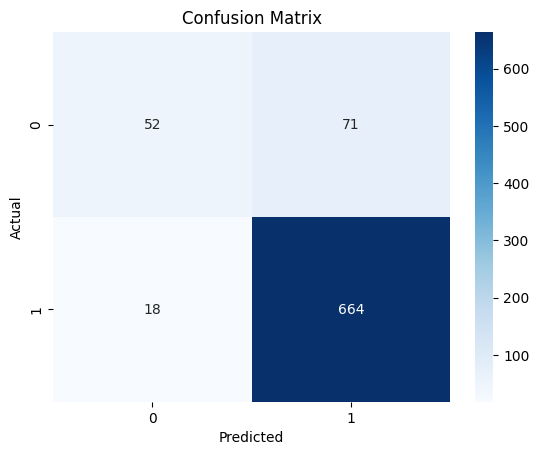

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

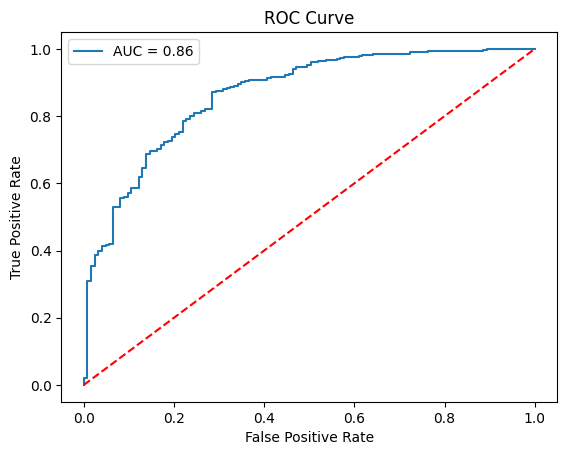

In [28]:
if len(y.unique()) == 2:  # Only for binary classification
    y_prob = log_reg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [29]:
log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_balanced.fit(X_train, y_train)
y_pred_bal = log_reg_balanced.predict(X_test)

print("\n⚖️ Model with Class Weight='balanced':")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("F1 Score:", f1_score(y_test, y_pred_bal, average='macro', zero_division=0))


⚖️ Model with Class Weight='balanced':
Accuracy: 0.7925465838509317
F1 Score: 0.6982548678525335


In [31]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("\n🏆 Best Hyperparameters Found:")
print(grid.best_params_)

# Evaluate best model
best_model = grid.best_estimator_
final_pred = best_model.predict(X_test)

print("\n🎯 Final Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, final_pred))
print("F1 Score:", f1_score(y_test, final_pred, average='macro', zero_division=0))


🏆 Best Hyperparameters Found:
{'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}

🎯 Final Model Evaluation:
Accuracy: 0.8894409937888199
F1 Score: 0.7380256763723989


c:\Users\saila\miniconda3\envs\mlproj39\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
36 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saila\miniconda3\envs\mlproj39\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\saila\miniconda3\envs\mlproj39\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\saila\miniconda3\envs\mlproj39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
   